# Classification Basics - Breast Cancer

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

In [216]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X,Y = data.data, data.target


In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

N, D = X_train.shape

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [218]:
model = nn.Sequential(
                        nn.Linear(D,5), 
                        nn.ReLU(),
                        nn.Linear(5,1), 
                        nn.Sigmoid()
                    )



In [219]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [220]:
n_epochs = 600

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_accv = np.zeros(n_epochs)
test_accv = np.zeros(n_epochs)

for it in range(n_epochs):

  optimizer.zero_grad()

  outputs = model(X_train)

  loss = criterion(outputs, y_train)
    
  loss.backward()

  optimizer.step()

  outputs_test = model(X_test)
  
  loss_test = criterion(outputs_test, y_test)

  with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
    
    train_accv[it] = train_acc
  
    test_accv[it] = test_acc
      
  train_losses[it] = loss.item()
 
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
 
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')
    print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")
 

Epoch 50/600, Train Loss: 0.5787, Test Loss: 0.6075
Train acc: 0.8136, Test acc: 0.7606
Epoch 100/600, Train Loss: 0.4018, Test Loss: 0.4409
Train acc: 0.9265, Test acc: 0.8883
Epoch 150/600, Train Loss: 0.2824, Test Loss: 0.3241
Train acc: 0.9423, Test acc: 0.9309
Epoch 200/600, Train Loss: 0.2135, Test Loss: 0.2521
Train acc: 0.9580, Test acc: 0.9415
Epoch 250/600, Train Loss: 0.1729, Test Loss: 0.2078
Train acc: 0.9633, Test acc: 0.9468
Epoch 300/600, Train Loss: 0.1462, Test Loss: 0.1764
Train acc: 0.9659, Test acc: 0.9468
Epoch 350/600, Train Loss: 0.1277, Test Loss: 0.1529
Train acc: 0.9659, Test acc: 0.9521
Epoch 400/600, Train Loss: 0.1124, Test Loss: 0.1349
Train acc: 0.9711, Test acc: 0.9681
Epoch 450/600, Train Loss: 0.0996, Test Loss: 0.1163
Train acc: 0.9711, Test acc: 0.9734
Epoch 500/600, Train Loss: 0.0903, Test Loss: 0.1033
Train acc: 0.9764, Test acc: 0.9734
Epoch 550/600, Train Loss: 0.0832, Test Loss: 0.0936
Train acc: 0.9790, Test acc: 0.9840
Epoch 600/600, Train L

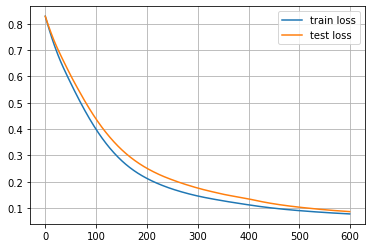

In [221]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.grid()
plt.show()

In [222]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9787


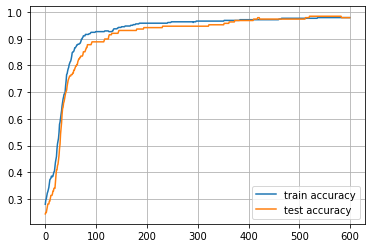

In [223]:
plt.plot(train_accv, label='train accuracy')
plt.plot(test_accv, label='test accuracy')
plt.legend()
plt.grid()
plt.show()

In [224]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3641,  0.1620,  0.1394,  0.0368,  0.1016,  0.1260,  0.0472,  0.0914,
                        0.0758, -0.4102,  0.0265,  0.0595,  0.1799,  0.1006, -0.2159, -0.0921,
                       -0.0245, -0.0130, -0.1617, -0.1445,  0.3356,  0.2696,  0.1168,  0.2263,
                        0.3110,  0.1628,  0.1626,  0.1576,  0.2848,  0.1701],
                      [-0.1795, -0.3727, -0.3618, -0.2010, -0.1367, -0.2195, -0.1599, -0.3423,
                       -0.0455,  0.4061, -0.2063,  0.0838, -0.4558, -0.3362,  0.3989, -0.1524,
                       -0.2785, -0.2720,  0.2843,  0.0088, -0.2734, -0.4055, -0.4980, -0.4031,
                       -0.0922, -0.2456, -0.4638, -0.1243, -0.2729, -0.1395],
                      [ 0.1795,  0.0513,  0.1548,  0.0171,  0.1550, -0.0162,  0.0438,  0.2714,
                        0.0723, -0.1950,  0.0296,  0.1105,  0.0692,  0.2302, -0.1808, -0.0409,
                       -0.0676, -0.0259, -0.2967, -0.2715,

In [225]:
torch.save(model.state_dict(), 'mymodel.pt')

In [226]:
model2 = nn.Sequential(
    nn.Linear(D, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [227]:
with torch.no_grad():
  
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9787
